In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, datetime
import pandas as pd
import requests
import seaborn as sns
sns.set(font_scale=1.5, style='white')
plt.ion()

## Enter your info here

In [2]:
# Choose your starting and ending dates for data
start_date = pd.to_datetime('November, 2016').to_pydatetime()
end_date = pd.to_datetime('November, 2018').to_pydatetime()

# Choose rows that have this name in them
name = "holdgraf"

## Download raw data

In [3]:
# Grab the data and subset the rows we want
url_data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUAL9ncZR5RodLq3K8_yAT0S8-SPgC4yBCPAPd2Jg4BtwZkSYEgWre4-9pRjzTiufbShQiI98mC2e-/pub?output=csv'
data_all = pd.read_csv(url_data, skiprows=1)

## Select rows from your query

In [4]:
# Pull a subset of rows for our query
data = data_all.loc[[name.lower() in row['Who'].lower() for (ix, row) in data_all.iterrows()]]

# Renaming things so they look pretty
data = data[['start', 'Type', 'Name']].rename(columns={'start': 'date', 'Type': 'kind', 'Name': 'name'})
data = data.dropna(subset=['date'])
rename_kinds = {'Free and open source software': 'FOSS',
                'Workshop, bootcamps, and others': "Workshop/bootcamp",
                'Non-academic communication (white paper, blogpost)': "Non-academic publication"}
data = data.replace({'kind':rename_kinds})

# Fixing and ordering dates
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date').reset_index(drop=True)
date_ranges = pd.date_range(data['date'].values[0], data['date'].values[-1], freq='W')

# Collect list of unique types for our colors
kind_counts = data['kind'].value_counts().to_frame()
kind_counts['ix'] = np.arange(len(kind_counts))
cmap = plt.cm.viridis
colors = [cmap(float(ii / len(kind_counts))) for ii in kind_counts['ix']]

## Make the viz

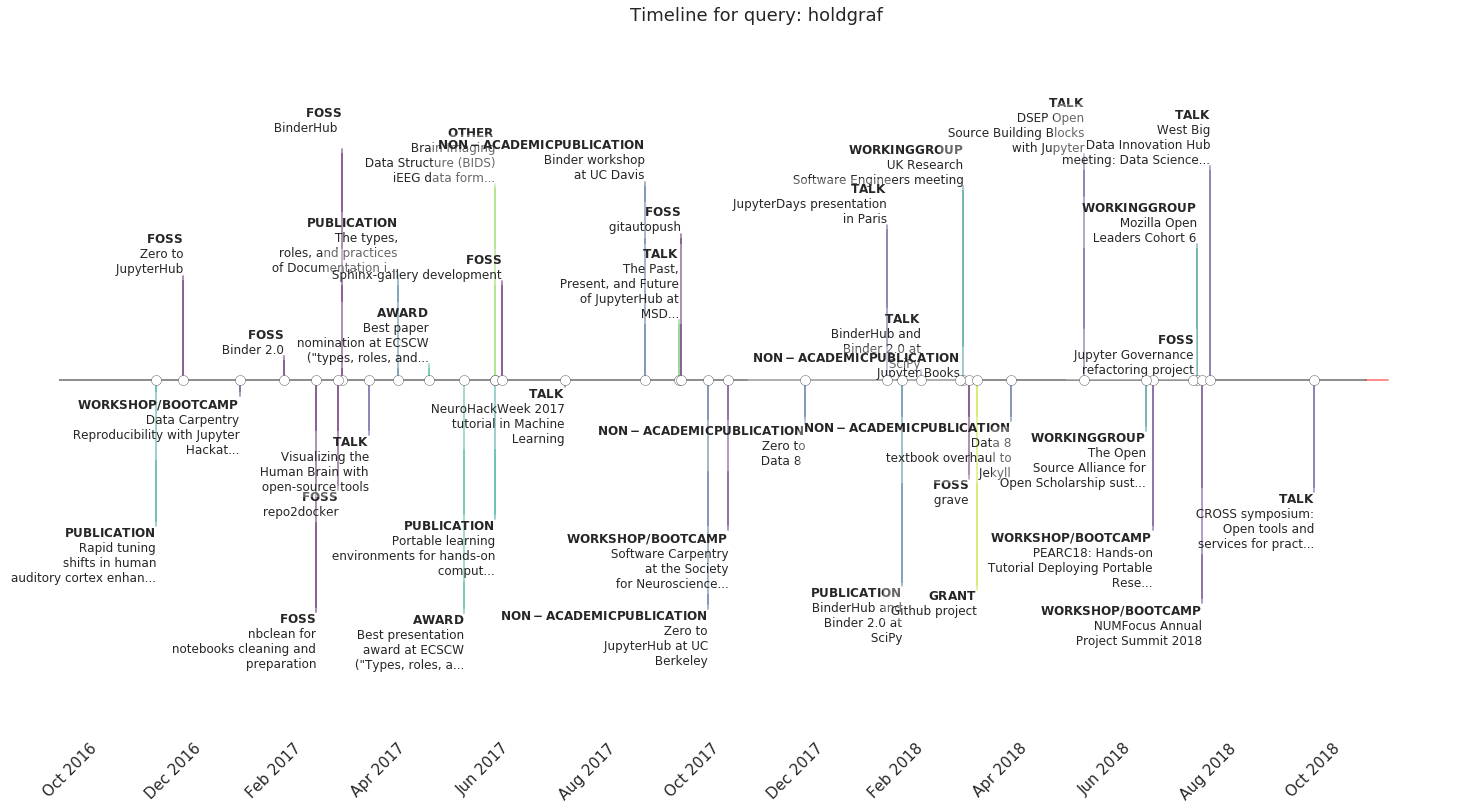

In [5]:
# Levels to to set how spread apart (vertically) the text is
levels = np.array([-3.5, 3.5, -2, 2, -.5, .5])
day_jitter_max = 25
day_jitter_max_td = timedelta(days=day_jitter_max)
today = pd.to_datetime(datetime.today()).to_pydatetime()

# Create the base line
fig, ax = plt.subplots(figsize=(25, 13))
ax.plot((start_date - day_jitter_max_td, today), (0, 0), 'k', alpha=.5)
ax.plot((today, end_date + day_jitter_max_td), (0, 0), 'r', alpha=.5)

for ix, (idate, ikind, iname) in data.iterrows():
    # Skip dates outside of our range
    if not isinstance(ikind, str):
        continue
    if idate < start_date:
        continue

    # Date jitters for nice plotting
    idate = idate.to_pydatetime()
    days_jitter = np.random.randint(-day_jitter_max, day_jitter_max)
    idate = idate + timedelta(days=int(days_jitter))
    
    # Build the words to display
    max_chars = 50
    if len(iname) > max_chars:
        iname = iname[:max_chars] + '...'
    words = [ii.strip() for ii in iname.split(' ')]
    for ii in np.arange(len(words))[1::3]:
        if ii >= len(words)-1:
            continue
        words[ii] += '\n'
    words.insert(0, '$\mathbf{'+ikind.upper()+'}$\n')
    iname = ' '.join(words)
    
    # Choose the y-axis level
    y_jitter = np.random.rand() - .5
    level = levels[ix % len(levels)] + y_jitter
    vert = 'top' if level < 0 else 'bottom'
    
    # Make the visual
    ax.scatter(idate.toordinal(), 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level),
            c=colors[kind_counts.loc[ikind]['ix']], alpha=.7)
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=12,
            backgroundcolor=(1., 1., 1., .3))

# Set up our xticks
plt_xticks = pd.date_range(start_date - day_jitter_max_td, end_date + day_jitter_max_td, freq='2M')
max_height = np.max(np.abs(levels)) + 2
ax.set_title('Timeline for query: {}'.format(name))
ax.set_ylim(-max_height, max_height)
ax.set_xticks(plt_xticks)
ax.set_xticklabels(plt_xticks.strftime("%b %Y"), rotation=45, horizontalalignment='right')
ax.set_xlabel('')
ax.set_xlim([start_date - day_jitter_max_td, None])
plt.setp(ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values()), visible=False);

In [6]:
for ii in data['name'].values:
    print('* ' + ii.strip())

* Matplotlib
* the BIDS partyparrot project
* MNE-python
* Encoding and Decoding Models in Cognitive Electrophysiology
* Data Science for Cognitive Neuroscience 
(Data8 Connector Course, Fall 2016 and Spring 2017)
* Data Driven Neuroscience bootcamp
* Sphinx-gallery documentation overhaul for Matplotlib
* Docathon
* Rapid tuning shifts in human auditory cortex enhance speech intelligibility
* Zero to JupyterHub
* Data Carpentry Reproducibility with Jupyter Hackathon
* Binder 2.0
* nbclean for notebooks cleaning and preparation
* BinderHub
* repo2docker
* The types, roles, and practices of Documentation in Data Analytics Open Source Software Libraries
* Visualizing the Human Brain with open-source tools
* Best paper nomination at ECSCW ("types, roles, and practices of documentation in data analytics open source software libraries")
* Best presentation award at ECSCW ("Types, roles, and practices of documentation in data analytics open source software libraries"
* Brain Imaging Data Stru